Introduction:

Housing Finance company which provides home loans for the houses which were present across all urban, semi-urban and rural areas for their valued customers.The company validates the eligibility of loan after customer applies for the loan.


Problem Statement: 

It's a Housing Finance Company who wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set. Additionally company can save alot of time, by not going manually and checking each and every applicant's application. 



Objective: 

This is a standard supervised classification task.A classification problem where we have to predict whether a loan would be approved or not. In a classification problem, we have to predict discrete values based on a given set of independent variables.

Contents:

This notebook is divided into the below sections:

1. Data Preparation & Data Pre-processing
2. Data Exploration
3. Exploratory Data Analysis 
4. Feature Engineering
5. Building Machine Learning Models

Data Description:

We have following variables in our dataset as follows:

1. Loan_ID
2. Gender
3. Married
4. Dependents
5. Education
6. Self-Emloyed
7. ApplicantIncome
8. CoApplicantIncome
9. Loan_Amount
10. Loan_Amount_Term
11. Credit_History
12. Property_Area
13. Loan_Status (Target Variable)

Some factors which effect the Loan Approval according to me:

1. Salary: Applicants with high income should have more chances of loan approval.
2. Previous history: Applicants who have repayed their previous debts should have higher chances of loan approval.
3. Loan amount: Loan approval should also depend on the loan amount. If the loan amount is less, chances of loan approval should be high.
4. Loan term: Loan for less time period and less amount should have higher chances of approval.
5. EMI: Lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval.

There might be many more factors which can also effect the loan approval for the customers.

In [70]:
# Importing all the packages 

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve, average_precision_score, f1_score, auc, confusion_matrix, accuracy_score
from sklearn.linear_model import LinearRegression

In [71]:
# Importing the file
 
loan = pd.read_csv("train.csv")
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [72]:
# Dropping Columns which are of no use and makes it difficult while Predicting using the Algorithm as it has some values like 3+

loan.drop(["Loan_ID","Dependents"], axis= 1,inplace = True)

In [73]:
# Exploring the dataset

loan.shape

(614, 11)

In [74]:
loan.columns

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [75]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [76]:
# Dataset Variables types in the dataset

loan.dtypes

Gender                object
Married               object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [77]:
# Getting an Overview of the person's who are getting their laon Application Approved and ejected

pd.crosstab(loan['Credit_History'], loan['Loan_Status'], margins = True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


In [78]:
# Finding any Missing Values in the dataset

loan.isnull().sum()

Gender               13
Married               3
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [79]:
# Handling this Missing Values

# Categorical Variables
loan['Gender'].fillna(loan['Gender'].mode()[0], inplace = True)
loan['Married'].fillna(loan['Married'].mode()[0], inplace = True)
loan['Self_Employed'].fillna(loan['Self_Employed'].mode()[0], inplace = True)
loan['Credit_History'].fillna(loan['Credit_History'].mode()[0], inplace = True)

# Numerical Variables
loan['LoanAmount'].fillna(loan['LoanAmount'].mean(), inplace = True)
loan['Loan_Amount_Term'].fillna(loan['Loan_Amount_Term'].mean(), inplace = True)



In [80]:
# Just to see did the Imputing for Misiing Values worked

loan.isnull().sum()

Gender               0
Married              0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [81]:
# Label Encoding

loan.replace({"Loan_Status":{"N":0,"Y":1}},inplace= True)
loan.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,Male,Yes,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,Male,Yes,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,Male,Yes,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,Male,No,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1


Loan_Status    0    1
Gender               
Female        37   75
Male         155  347


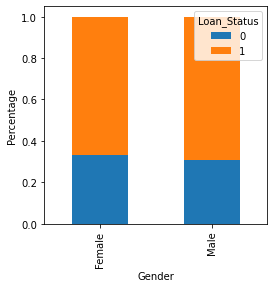

In [82]:
# Visualizing the dataset

# Gender and Loan Status
print(pd.crosstab(loan["Gender"],loan["Loan_Status"]))
Gender = pd.crosstab(loan["Gender"],loan["Loan_Status"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Gender")
plt.ylabel("Percentage")
plt.show()

Loan_Status    0    1
Married              
No            79  134
Yes          113  288


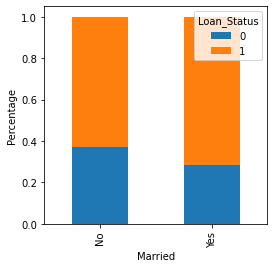

In [83]:
# Married Status and Loan Status
# If a person is married there's a high chance they will get a loan compared to to the Non-Married one's

print(pd.crosstab(loan["Married"],loan["Loan_Status"]))
Married=pd.crosstab(loan["Married"],loan["Loan_Status"])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Married")
plt.ylabel("Percentage")
plt.show()

Loan_Status     0    1
Education             
Graduate      140  340
Not Graduate   52   82


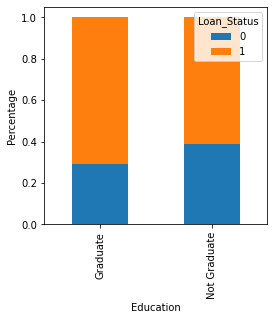

In [84]:
#Loan_status vs Education

print(pd.crosstab(loan["Education"],loan["Loan_Status"]))
Education = pd.crosstab(loan["Education"],loan["Loan_Status"])
Education.div(Education.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Education")
plt.ylabel("Percentage")
plt.show()

Loan_Status       0    1
Credit_History          
0.0              82    7
1.0             110  415


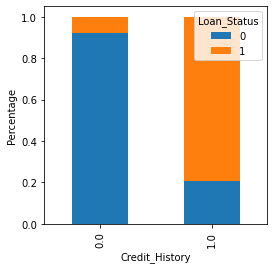

In [85]:
#Loan_status vs Credit_History

print(pd.crosstab(loan["Credit_History"],loan["Loan_Status"]))
CreditHistory = pd.crosstab(loan["Credit_History"],loan["Loan_Status"])
CreditHistory.div(CreditHistory.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Credit_History")
plt.ylabel("Percentage")
plt.show()

<AxesSubplot:>

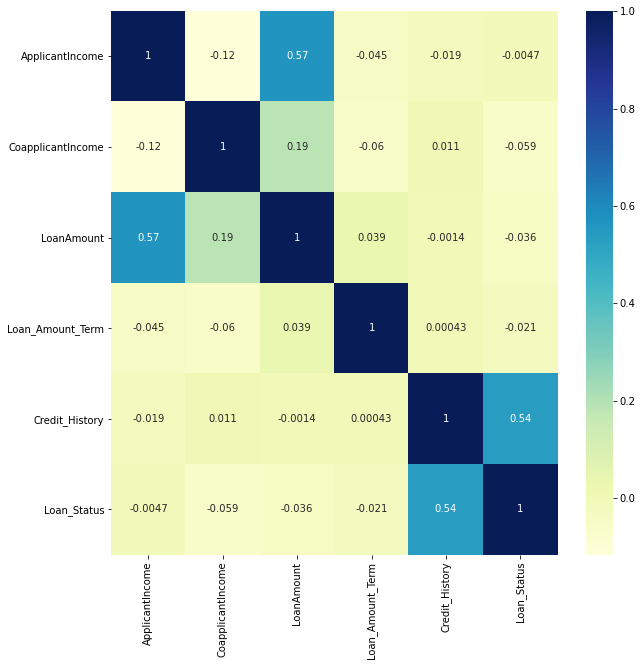

In [86]:
# Correlation Matrix

corr = loan.corr()
plt.figure(figsize = (10,10))
sns.heatmap(corr, annot = True, cmap = "YlGnBu")

In [87]:
# Converting Categorical Variables to numerical values
# from sklearn.preprocessing import LabelEncoder

cols = ["Gender","Married","Education","Self_Employed","Property_Area","Loan_Status"]
le = LabelEncoder()
for col in cols:
    loan[col] = le.fit_transform(loan[col])
loan.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [88]:
# Splitting the Dataset into Training and test splits

from sklearn.model_selection import train_test_split  
X = loan.drop("Loan_Status", axis=1) 
y = loan["Loan_Status"] 

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state= 2) 
print(X_train.shape) 
print(y_train.shape)
print(X_test.shape) 
print(y_test.shape)

(491, 10)
(491,)
(123, 10)
(123,)


In [89]:
# Feature Scalling
# As you can see that Independent Varaibles values some are too small and some have very large values so bring them to a common scale feature scalling is must 

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [90]:
# Logistic Regression Algorithm

# Fitting the model in the training set
linearlog_model = LogisticRegression(solver='liblinear').fit(X_train, y_train)
log_pred = linearlog_model.predict(X_test)

print('Logistic Regression')
print('Cross Validation Score ',cross_val_score(linearlog_model, X_train, y_train, cv=3))
cm = pd.DataFrame(confusion_matrix(y_test, log_pred))
print("Confusion Matrix\n",cm)

# Accuracy of the Model
accuracy_score(y_test,log_pred)*100

Logistic Regression
Cross Validation Score  [0.82926829 0.82926829 0.7791411 ]
Confusion Matrix
     0   1
0  13  26
1   2  82


77.23577235772358

<AxesSubplot:>

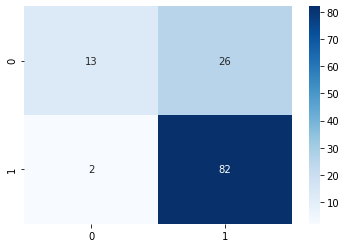

In [91]:
sns.heatmap(cm, annot = True, cmap = "Blues")

In [92]:
# Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier

# Fitting the model in the training set
decision_tree_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0).fit(X_train, y_train)
dt_pred = decision_tree_model.predict(X_test)

print('Decision Tree')
print('Cross Validation Score ',cross_val_score(decision_tree_model, X_train, y_train, cv=5))
cm = pd.DataFrame(confusion_matrix(y_test, dt_pred))
print("Confusion Matrix\n",cm)

# Accuracy of the Model
accuracy_score(y_test,dt_pred)*100

Decision Tree
Cross Validation Score  [0.72727273 0.71428571 0.70408163 0.79591837 0.67346939]
Confusion Matrix
     0   1
0  21  18
1  16  68


72.35772357723577

<AxesSubplot:>

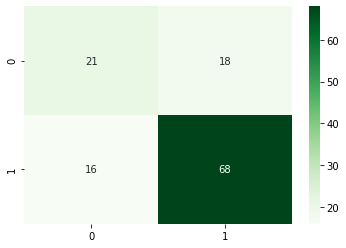

In [93]:
sns.heatmap(cm, annot = True, cmap = "Greens")

In [94]:
# KNN Algorithm

# Fitting the model in the Training set
knn_model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2).fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

print('KNN')
print('Cross Validation Score ',cross_val_score(knn_model, X_train, y_train, cv=5))
cm = pd.DataFrame(confusion_matrix(y_test, knn_pred))
print("Confusion Matrix\n",cm)

# Accuracy of the Model
accuracy_score(y_test,knn_pred)*100

KNN
Cross Validation Score  [0.7979798  0.81632653 0.7755102  0.81632653 0.76530612]
Confusion Matrix
     0   1
0  14  25
1   2  82


78.04878048780488

<AxesSubplot:>

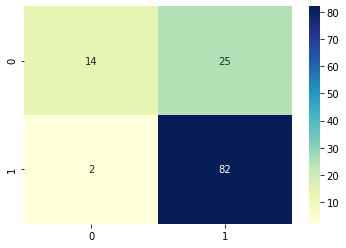

In [95]:
sns.heatmap(cm, annot = True, cmap = "YlGnBu")

In [96]:
# Support Vactor Machine Algorithm
from sklearn.svm import SVC

# Fitting the model in the training set
svc = SVC(kernel = 'rbf',gamma = 0.1, random_state = 0).fit(X_train, y_train)
svc_pred = svc.predict(X_test)

print('SVM')
print('Cross Validation Score ',cross_val_score(svc, X_train, y_train, cv=4))
cm = pd.DataFrame(confusion_matrix(y_test, svc_pred))
print("Confusion Matrix\n",cm)

# Accuracy of the model
accuracy_score(y_test,svc_pred)*100

SVM
Cross Validation Score  [0.80487805 0.85365854 0.82926829 0.7704918 ]
Confusion Matrix
     0   1
0  13  26
1   1  83


78.04878048780488

<AxesSubplot:>

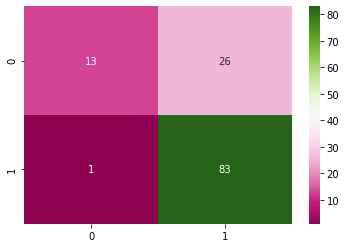

In [97]:
sns.heatmap(cm, annot = True, cmap = "PiYG")